<a href="https://colab.research.google.com/github/faithNassiwa/predictive-diagnosis-assistant/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silhouette Score: 0.7542265247149782


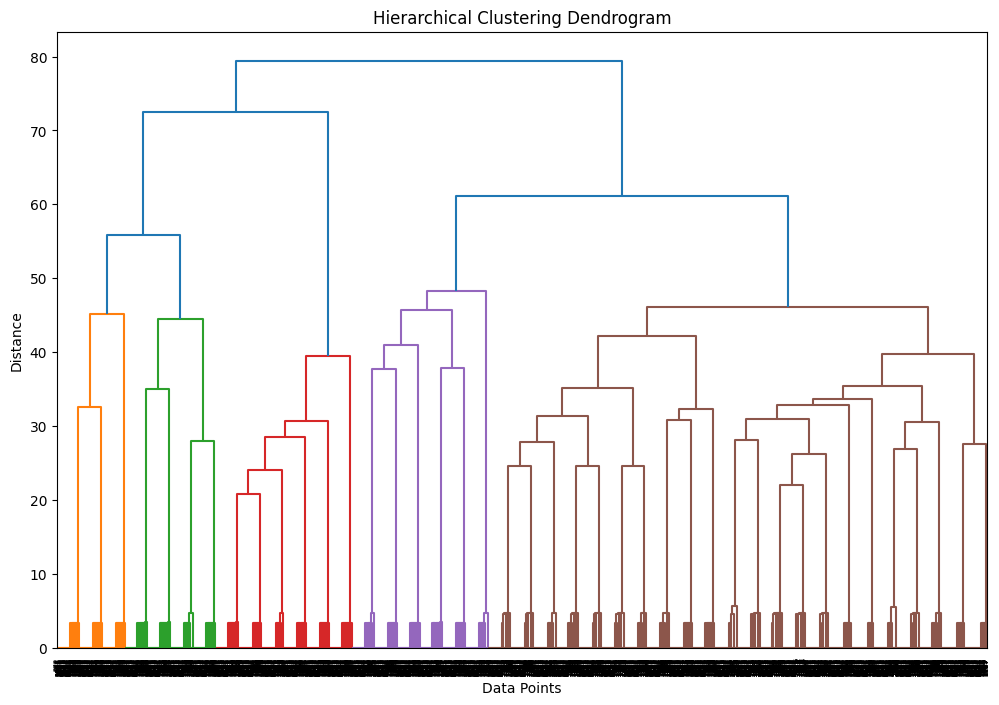

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

symptom_data = pd.read_csv("/content/Training.csv", usecols = lambda col: col not in ["Unnamed: 133"])
symptom_data = symptom_data.iloc[:, :-1]

symptom_matrix = symptom_data.to_numpy()

linked = linkage(symptom_matrix, method='ward', metric='euclidean')
threshold = 10
labels = fcluster(linked, t=threshold, criterion='distance')

silhouette_avg = silhouette_score(symptom_matrix, labels)
print(f"Silhouette Score: {silhouette_avg}")

plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


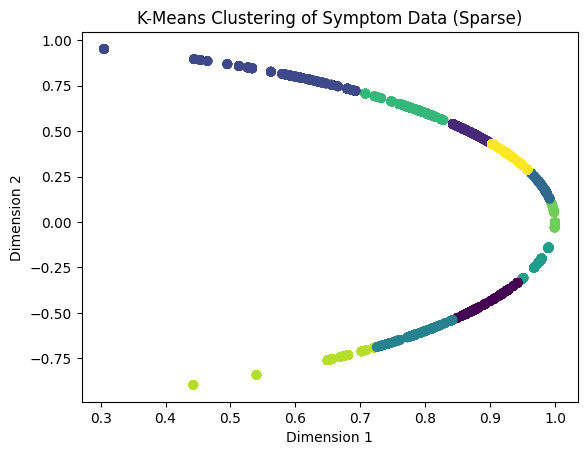

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline


symptom_data = pd.read_csv("/content/Training.csv", usecols=lambda col: col not in ["Unnamed: 133"])
symptom_data = symptom_data.iloc[:, :-1]

data = symptom_data.to_numpy()


num_components = 2
svd = TruncatedSVD(n_components=num_components)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

data_reduced = lsa.fit_transform(data)

num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_reduced)


labels = kmeans.labels_


plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering of Symptom Data (Sparse)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


Silhouette Score: 0.4692389720692761


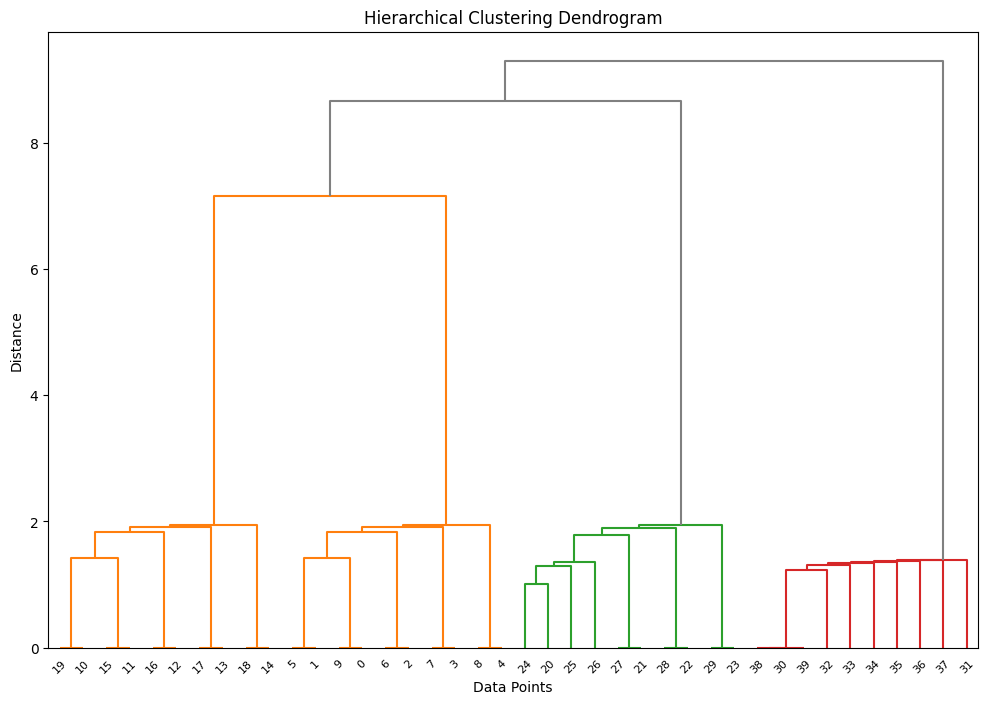

In [ ]:

symptom_data = symptom_data[:40]
symptom_matrix = symptom_data.to_numpy()
linked = linkage(symptom_matrix, method='ward', metric='euclidean')
threshold = 8
labels = fcluster(linked, t=threshold, criterion='distance')
silhouette_avg = silhouette_score(symptom_matrix, labels)
print(f"Silhouette Score: {silhouette_avg}")

plt.figure(figsize=(12, 8))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    above_threshold_color='gray',
    color_threshold=threshold,
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
